# 4. 동적 프로그래밍

벨만 방정식을 이용하면 연립방정식을 얻을 수 있고, 그 연립방정식을 풀 수 있다면 가치 함수를 구할 수 있습니다. 
<p align="center"><img src="./images/fig_04_01.png" width=500></p>

이와 같이 상태 전이 확률 $p(s'|s,a)$, 보상 함수 $r(s,a,s')$, 정책 $\pi(a|s)$ 라는 세 가지 정보가 있다면 벨만 방정식을 이용해 연립방정식을 구할 수 있습니다.  
그리고 연립방벙식을 푸는 프로그램(연립방정식 계산기)을 사용하여 가치 함수를 구할 수 있습니다. 하지만 연립방정식을 직접 푸는 방식은 간단한 문제에서만 의미가 있습니다.

그래서 등장한 것이 바로 동적 프로그래밍(Dynamic Programming) 혹은 동적 계획법입니다. 동적 프로그래밍을 이용하면 상태와 행동의 수가 어느 정도 많아져도 가치함수를 구할 수 있습니다.  

## 4.1 동적 프로그래밍과 정책 평가

강화 학습 문제에서는 종종 두 가지 문제를 해결해야 합니다.  

정책평가 - 정책 $\pi$가 주어졌을 때 그 정책의 가치 함수 $v_\pi(s)$ 또는 $q_\pi(s,a)$를 구하는 문제  
정책제어 - 정책을 조정하여 최적 정책을 만들어내는 것

### 4.1.1 동적 프로그래밍 기초

가치 함수
<p align="center"><img src="./images/eq_04_00.png" width=500></p>

벨만 방정식
<p align="center"><img src="./images/eq_04_01.png" width=700></p>  

벨만 방정식은 '현재 상태 s의 가치 함수 $v_\pi(s)$'와 '다음 상태 $s'$의 가치 함수 $v_\pi(s')$'의 관계를 나타냅니다.  
DP를 사용한 방법은 벨만 방정식을 '갱신식으로 변형하는 것입니다.

<p align="center"><img src="./images/eq_04_02.png" width=700></p>  

[식4.2]의 특징은 '다음 상태의 가치 함수 $V_k(s')$'를 이용하여 '지금 상태의 가치 함수 $V_{k+1}(s)$'를 갱신한다는 점입니다.  
그리고 이식은 '추정치 $V_k(s')$'을 사용하여 '또 다른 추정치 $V_{k+1}(s)$'를 개선합니다.  
이처럼 추정치를 사용하여 추정치를 개선하는 과정을 부트스트래핑 bootstrapping 이라고 부릅니다.

**반복적 정책 평가** iterative policy evaluation  
- 모든 상태에서 $V_0(s) = 0$으로 초기화 합니다.
- [식4.2]를 이용하여 $V_0(s)$에서 $V_1(s)$로 갱신합니다.
- 이어서 $V_1(s)$를 기반으로 $V_2(s)$로 갱신합니다.
- 이 일을 반복하다 보면 최종 목표인 $V_\pi(s)$에 가까워집니다.

> NOTE 동적 프로그래밍(DP)은 특정한 성격을 지닌 알고리즘들의 총칭입니다. 대상 문제를 작은 문제로 나누어 답을 구하는 
기법 전반을 말합니다. DP의 핵심은 '같은 계산을 두 번 하지 않는 것'입니다. 구현하는 방법은 하향식과 상향식이 있습니다.

### 4.1.2 반복적 정책 평가_첫 번째 구현

<p align="center"><img src="./images/fig_04_02.png" width=600></p>

그림에서와 같이 에이전트는 무작위 정책 $\pi$에 따라 행동합니다. 참고로 이 문제에서 상태 전이는 결정적입니다.  
즉 어떤 상태 에서 행동 a를 수행하면 다음 상태 s'는 한 가지로 귀결됩니다.   
수식에서는 다음 상태 s'가 함수 f(s,a)에 의해 고유하게 결정된다고 가정합니다.  
그렇다면 가치 함수 갱신식인 [식4.2]를 다음과 같이 단순화할 수 있습니다.

<p align="center"><img src="./images/fig_04_03.png" width=600></p>

이번 문제에서는 다음 상태가 s'가 고유하게 결정되므로 $\displaystyle\sum_{s'}$ 처럼  
모든 상태에 대한 합을 구할 필요없이 하나의 s'에 대해서만 계산하면 됩니다. 이를 표현한 것이 [식4.3]입니다

이제 정책 $\pi$의 가치 함수를 반복적 정책 평가 알고리즘으로 구해보겠습니다.  
초기값 $V_0(s) = 0$  
<p align="center"><img src="./images/fig_04_03_1.png" width=200></p>

[식4.3]에 따라 $V_0(s)$를 갱신
<p align="center"><img src="./images/fig_04_04.png" width=500></p>

그리과 같이 두 갈래 길로 나뉩니다. 하나는 0.5의 확률로 왼쪽으로 가는 행동을 선택해 -1의 보상을 받고  
상태는 L1로 유지됩니다. 여기에 할인률 $\gamma$를 0.9로 가정하고 [식4.3]에 대입하면 다음과 같습니다.
<p align="center"><img src="./images/fig_04_04_1.png" width=300></p>

또 다른 가능성은 L1에서 오른쪽으로 가는 행동을 선택한 경우입니다. 보상으로 1을 받고 상태 L2로 이동합니다.
이를 [식4.3]에 대입하면,
<p align="center"><img src="./images/fig_04_04_2.png" width=250></p>

이상으로부터 $V_1(L1)$은 다음과 같이 구할 수 있습니다.
<p align="center"><img src="./images/fig_04_04_3.png" width=400></p>
<p align="center"><img src="./images/fig_04_04_4.png" width=400></p>

이것으로 모든 상태에 대한 가치 함수 갱신이 끝났습니다. (이번 문제는 상태가 총 2개뿐입니다).
<p align="center"><img src="./images/fig_04_05.png" width=400></p>

그림과 같이 $V_0(s)$를 $V_1(s)$로 갱신했습니다. 이제부터는 같은 과정을 반복하면 됩니다. $V_1(s)$를 $V_2(s)$로 계산하고, $V_2(s)$를 $V_3(s)$로 계산하는 식으로 반복합니다.

In [61]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

for _ in range(100):
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = new_V.copy()

print(V)

{'L1': -2.2499335965027827, 'L2': -2.7499335965027827}


<p align="center"><img src="./images/eq_03_10_2.png" width=200></p> 

이번에는 임곗값을 설정하여 갱신 횟수를 자동으로 결정해보겠습니다.

In [62]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

cnt = 0  # 갱신 횟수 기록
while True:
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

     # 갱신된 양의 최댓값
    delta = abs(new_V['L1'] - V['L1'])
    delta = max(delta, abs(new_V['L2'] - V['L2']))
    V = new_V.copy()

    cnt += 1
    if delta < 0.0001:  # 임계값 = 0.0001
        print(V)
        print('갱신 횟수:', cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
갱신 횟수: 76


### 4.1.3 반복적 정책 평가_다른 구현 방법

4.1.2절에서는 반복적 정책 평가 알고리즘을 구현하기 위해 현재의 가치 함수를 보관하는 V, 다른 하나는 갱신 시 사용하는 new_V의 2개의 딕셔너리를 사용하였습니다.

<p align="center"><img src="./images/fig_04_06.png" width=500></p> 
<p align="center"><img src="./images/fig_04_07.png" width=500></p> 

새로운 방식에서는 V 하나만 사용하여 각 원소를 덮어씁니다. 이를 '덮어쓰기 방식'이라고 부르겠습니다.

In [63]:
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0  # 갱신 횟수 기록
while True:
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001:  # 임계값 = 0.0001
        print(V)
        print('갱신 횟수:', cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
갱신 횟수: 60


## 4.2 더 큰 문제를 향해

반복적 정책 평가 알고리즘을 이용하면 상태와 행동 패턴의 수가 어느 정도 많아져도 빠르게 풀 수 있습니다.

<p align="center"><img src="./images/fig_04_08.png" width=500></p> 

<p align="center"><img src="./images/fig_04_08_1.png" width=700></p> 

### 4.2.1 GridWorld 클래스 구현

In [64]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3] # 행동 공간(가능한 행동들)
        self.action_meaning = { # 행동의 의미
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(  # 보상 맵(각 좌표의 보상 값)
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)    # 목표 상태(좌표)
        self.wall_state = (1, 1)    # 벽 상태(좌표)
        self.start_state = (2, 0)   # 시작 상태(좌표)
        self.agent_state = self.start_state   # 에이전트 초기 상태(좌표)

<p align="center"><img src="./images/fig_04_09.png" width=500></p> 

In [65]:
class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3] # 행동 공간(가능한 행동들)
        self.action_meaning = { # 행동의 의미
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(  # 보상 맵(각 좌표의 보상 값)
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)    # 목표 상태(좌표)
        self.wall_state = (1, 1)    # 벽 상태(좌표)
        self.start_state = (2, 0)   # 시작 상태(좌표)
        self.agent_state = self.start_state   # 에이전트 초기 상태(좌표)
        
    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space # [0, 1, 2, 3]

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

In [66]:
env = GridWorld()

# env.height() 대신 env.height로 사용 가능
print(env.height) # [출력 결과] 3
print(env.width)  # [출력 결과] 4
print(env.shape)  # [출력 결과] (3, 4)

3
4
(3, 4)


In [69]:
for action in env.actions():  # 모든 행동에 순차적으로 접근
    print(action)

print('======')

for state in env.states():  # 모든 상태에 순차적으로 접근
    print(state)

0
1
2
3
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


> NOTE : states() 메서드에서는 yield를 사용했습니다. yield 는 return과 마찬가지로 함수의 값을 반환하지만, 함수의 실행을 잠시 멈추고 다른 일을 처리할 기회를 준다는 점에서 차이가 있습니다. 다른 일이 끝나면 멈췄던 부분부터 함수 처리를 다시 시작합니다. 이 기능 덕분에 앞의 코드처럼 for문과 같은 반복 처리와 함께 사용할 수 있습니다.

In [70]:
class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3] # 행동 공간(가능한 행동들)
        self.action_meaning = { # 행동의 의미
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(  # 보상 맵(각 좌표의 보상 값)
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)    # 목표 상태(좌표)
        self.wall_state = (1, 1)    # 벽 상태(좌표)
        self.start_state = (2, 0)   # 시작 상태(좌표)
        self.agent_state = self.start_state   # 에이전트 초기 상태(좌표)
        
    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space # [0, 1, 2, 3]

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

    def next_state(self, state, action):
        # 1. 이동 위치 계산
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        # 2. 이동한 위치가 그리드 월드의 테두리 밖이나 벽인가?
        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state
        elif next_state == self.wall_state:
            next_state = state

        return next_state  # 3. 다음 상태 반환

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]

- 1에서는 벽이나 그리드 월드의 테두리는 무시하고 이동위치(다음 상태)를 계산합니다.
- 2에서 테두리 밖이나 벽으로 이동하지 않았는지 확인하여 이동이 불가능하다면 현재 위치를 유지(next_state = state)
- 3에서 다음 상태를 반환합니다.

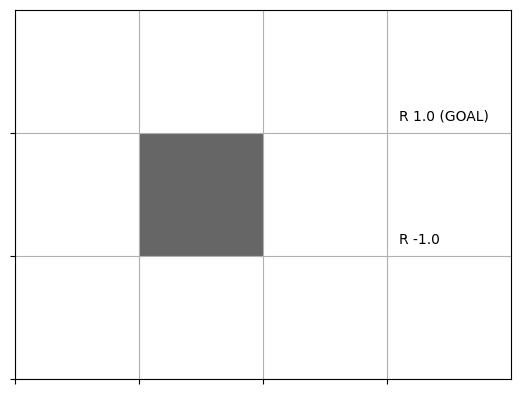

In [71]:
from common_.gridworld import GridWorld

env = GridWorld()
env.render_v()

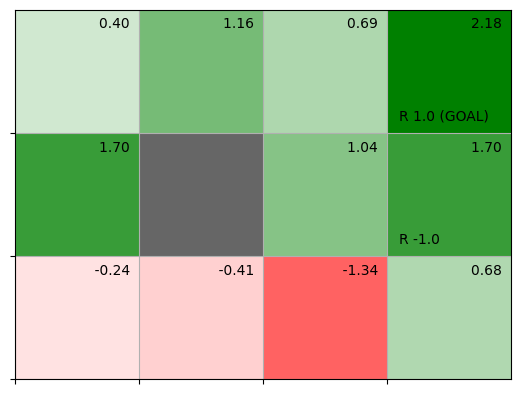

In [73]:
from common_.gridworld import GridWorld

env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()  # 더미 상태 가치 함수
env.render_v(V)

### 4.2.2 defaultdict 사용법

In [74]:
from common_.gridworld import GridWorld

env = GridWorld()
V = {}

# 딕셔너리 원소 초기화
for state in env.states():
    V[state] = 0

state = (1, 2)
print(V[state]) # 상태 (1,2)의 가치 함수 출력

0


In [75]:
from collections import defaultdict  # defaultdict 임포트
from common_.gridworld import GridWorld

env = GridWorld()
V = defaultdict(lambda: 0)

state = (1, 2)
print(V[state]) # [출력 결과] 0

0


만약 딕셔너리에 존재하지 않는 키를 건네면 (주어진 키, 기본값) 형태의 원소를 새로 만들어 넣습니다.  
기본값은 딕셔너리를 생성할 때 설정한 값입니다.

In [76]:
pi = defaultdict(lambda: {0: 0.25, 1:0.25, 2:0.25, 3:0.25})

state = (0, 1)
print(pi[state]) # [출력 결과] {0: 0.25, 1:0.25, 2:0.25, 3:0.25}

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


### 4.2.3 반복적 정책 평가 구현

이제 반복적 정책 평가 알고리즘을 구현하겠씁니다.  
여기서 구현할 eval_onestep() 함수는 4개의 매개변수를 받습니다.
- pi (defaultdict): 정책
- V (defaultdict): 가치 함수
- env (GridWorld): 환경
- gamma (float): 할인율

In [78]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():  # 1. 각 상태에 접근
        if state == env.goal_state:  # 2. 목표 상태에서의 가치 함수는 항상 0
            V[state] = 0
            continue

        action_probs = pi[state]
        new_V = 0

        # 3. 각 행동에 접근        
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            # 4. 새로운 가치 함수
            new_V += action_prob * (r + gamma * V[next_state])

        V[state] = new_V
    return V

<p align="center"><img src="./images/fig_04_12.png" width=500></p> 

- 1. 모든 상태를 하나씩 추적
- 2. 상태 state가 목표 상태이면 가치 함수를 0으로 설정
- 3. 행동의 확률 분포를 가져옵니다. 그리고 상태 전이 함수(env.next_state(state_action))로 다음 상태(next_state)를 얻습니다.
- 4. 이 정보들로 반복적 정책 평가 알고리즘의 갱신식인 [식4.3]을 계산합니다.

<p align="center"><img src="./images/eq_04_03.png" width=700></p> 

In [79]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()  # 갱신 전 가치 함수
        V = eval_onestep(pi, V, env, gamma)

        # 갱신된 양의 최댓값 계산
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        # 임계값과 비교
        if delta < threshold:
            break
    return V

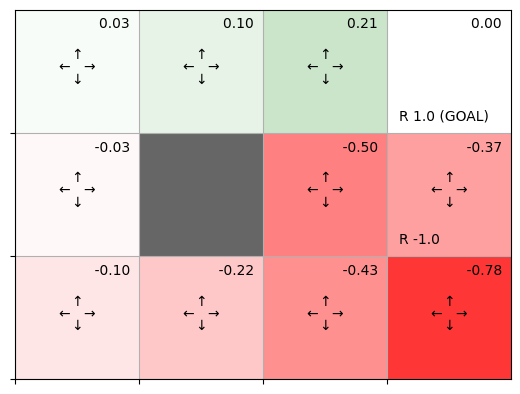

In [81]:
env = GridWorld()
gamma = 0.9  # 할인율

pi = defaultdict(lambda: {0: 0.25, 1:0.25, 2:0.25, 3:0.25}) # 정책
V = defaultdict(lambda:0) # 가치 함수

V = policy_eval(pi, V, env, gamma)  # 정책 평가
env.render_v(V, pi) # 시각화

<p align="center"><img src="./images/fig_04_13.png" width=600></p> 

왼쪽 맨 아래 칸의 가치 함수는 -0.10입니다. 시작점에서 무작위로 움직이면 기대수익이 -0.10이라는 뜻입니다. 에이전트가 무작위로 움직이기 때문에 폭탄을 (의도치 않게) 얻을 수도 있습니다. 값이 -0.10인 것 보니 사과(+1)보다 폭탄(-1)을 얻을 확률이 조금 더 큽니다. 또한 맨 아래 줄과 가운데 줄은 모두 마이너스인데, 이 위치들에서는 폭탄의 영향이 더 크다는 뜻입니다.

## 4.3 정책 반복법

> NOTE 벨만 최적 방정식을 직접 계산하는 방식은 비현실적인 경우가 많습니다. 그래서 첫번째 단계로 현재의 정책을 평가합니다. 현재의 정책을 제대로 평가할 수 있다면 이를 기초로 '개선'할 수 있기 때문입니다.

앞 절에서는 DP를 사용하여 정책을 평가했습니다. '반복적 정책 평가'라는 알고리즘으로 정책을 '평가'할 수 있게 되었습니다. 평가를 할 수 있게 되었으니 정책을 살짝 수정하여 더 나아지는지 '비교'하며 '개선'할 수 도 있습니다.

### 4.3.1 정책 개선

정책을 개선하는 힌트는 '최적 정책'에서 찾을 수 있습니다.
- 최적 정책: $\mu_*(s)$
- 최적 정책의 상태 가치 함수: $v_*(s)$
- 최적 정책의 행동 가치 함수(Q 함수): $q_*(s,a)$

<p align="center"><img src="./images/eq_04_05.png" width=700></p> 

이 식에서 최적 정책은 $\displaystyle \argmax_{a}$  연산이 찾아줍니다. 이 연산은 국소적인 후보 중에서 최선의 행동을 선택해줍니다.
이를 탐욕정책 greedy policy이라고 합니다.

[식4.4]는 최적 정책 에 대한 $\mu_*$식이지만, 여기서는 '임의의 결정적 정책' $\mu$에 [식4.4]를 다음과 같이 적용해봅시다.

<p align="center"><img src="./images/eq_04_07.png" width=700></p>

- 현 상태의 정책: $\mu(s)$
- 정책 $\mu(s)$의 상태 가치 함수: $v_\mu(s)$
- 새로운 정책: $\mu'(s)$

모든 상태 s에서 $\mu(s)$와 $\mu'(s)$가 같다면, 정책 $\mu(s)$는 이미 최적정책입니다.  
$$\mu(s)= \displaystyle \argmax_{a} q_\mu(s,a)$$

정책 $\mu'$가 정책$\mu$와 달라진다면 항상 기존 정책보다 개선된다는 사실이 밝혀졌습니다.  
더 구체적으로 말하면, 모든 상태 s에서 $v_{\mu'}(s) ≥ v_{\mu}(s)$가 성립합니다.
- 정책이 항상 개선된다.
- 만약 정책이 개선(갱신)되지 않는다면 그 정책이 곧 최적 정책이다. 

> NOTE 정책이 개선된다는 수학적 근거는 정책 개선 정리 policy improvement theorem에 잘 나와 있습니다. 증명은 다른 문헌[5]을 참고하기 바랍니다.

### 4.3.2 평가와 개선 반복

이번 절에서는 상태 가치 함수를 사용한 [식4.7]을 기준으로 이야기를 진행하겠습니다. 또한 더 앞서 4.2절에서 상태 가치 함수를 평가하는 알고리즘을 구현했습니다. 이 두가지가 최적 정책을 찾는 방법의 핵심입니다.

<p align="center"><img src="./images/fig_04_14.png" width=200></p>
<p align="center"><img src="./images/fig_04_14_1.png" width=700></p>

이 과정을 계속하면 탐욕화를 해도 정책이 더 이상 갱신되지 않는 지점에 도달합니다. 그때의 정책이 바로 최적 정책입니다.  
그리고 최적 가치 함수입니다. 이렇게 평가와 개선을 반복하는 알고리즘을 정책반복법 policy iteration이라고 합니다.

> NOTE 환경은 상태 전이 확률 $p(s'|s,a)$와 보상 함수 $r(s,a,s')$로 표현됩니다. 강화학습에서는 이 둘을 가리켜 '환경 모델' 또는 단순히 '모델'이라고 합니다. 환경 모델이 알려져 있다면 에이전트는 아무런 행동 없이 가치 함수를 평가할 수 있습니다. 그리고 정책 반복법을 이용하면 최적 정책도 찾을 수 있습니다. 에이전트가 실제 행동을 하지 않고 최적 정책을 찾는 문제를 **계획 문제** planning problem 라고 합니다.  
반면 강화 학습은 환경 모델을 알 수 없는 상황에서 수행하는 경우가 많은데, 그럴 때는 에이전트가 실제로 행동을 취해 경험 데이터를 쌓으면서 최적 정책을 찾습니다.

## 4.4 정책 반복법 구현

<p align="center"><img src="./images/fig_04_15.png" width=300></p>

### 4.4.1 정책 개선

정책을 개선하기 위해서는 현재의 가치 함수에 대한 탐욕 정책을 구합니다.
<p align="center"><img src="./images/eq_04_07.png" width=700></p>

또한 이번 문제에서 상태는 고유하게 전이됩니다. 즉 결정적입니다. 따라서 탐욕화를 다음과 같이 단순화할 수 있습니다.

<p align="center"><img src="./images/eq_04_08.png" width=700></p>

[식4.8]과 같이 다음 상태 s'는 하나만 존재할 수 있습니다.

In [49]:
def argmax(d):
    """d (dict)"""
    max_value = max(d.values())
    max_key = -1
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key

In [50]:
action_values = {0:0.1, 1:-0.3, 2:9.9, 3:-1.3}

max_action = argmax(action_values)
print(max_action)

2


In [51]:
def greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state] # 1
            action_values[action] = value

        max_action = argmax(action_values) # 2
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs # 3
    return pi

greedy_policy(V, env, gamma)함수는 가치 함수 V, 환경 env, 할인율 gamma를 매개변수로 받고, 건네진 가치 함수 V를 사용하여 탐욕화한 정책을 반환합니다.

1에서는 각 행동을 대상으로 [식4.8]의 $r(s,a,s')+\gamma v_\pi(s')$ 부분을 계산합니다. 그리고 2에서 argmax() 함수를 호출하여 가치 함수 값이 가장 큰 행동을 찾은 다음 max_action이 선택될 확률이 1.0이 되도록 (결정적이 되도록) 확률분포를 생성합니다. 그리고 이를 상태 state에서 취할 수 있는 행동의 확률 분포로 설정합니다.

### 4.4.2 평가와 개선 반복

평가와 개선을 반복하는 '정책 반복법' 구현  
policy_iter(env, gamma, thresold=0.001, is_render=False)라는 함수로 구현
- env(Environment): 환경
- gamma(float): 할인율
- thresold(float): 정책을 평가할 때 갱신을 중지하기 위한 임곗값
- is_render(bool): 정책 평가 및 개선 과정을 렌더링할 지 여부

In [53]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)  # 1 평가
        new_pi = greedy_policy(V, env, gamma)          # 2 개선

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:  # 3 갱신 여부 확인
            break
        pi = new_pi

    return pi

먼저 정책 pi 와 가치 함수 V를 초기화합니다. 정책 pi의 초깃값은 각 행동이 균등하게 선택되도록 설정했습니다.  
- 1에서는 현재의 정책을 평가하여 가치 함수 V를 얻습니다.  
- 2에서 V를 바탕으로 탐욕하된 정책 new_pi를 얻습니다.  
- 3에서는 정책이 갱신되었는지 확인하고, 갱신되지 않는다면 벨만 최적 방정식을 만족하는 것이고  
이때의 pi가 최적 정책이라는 뜻이 됩니다.

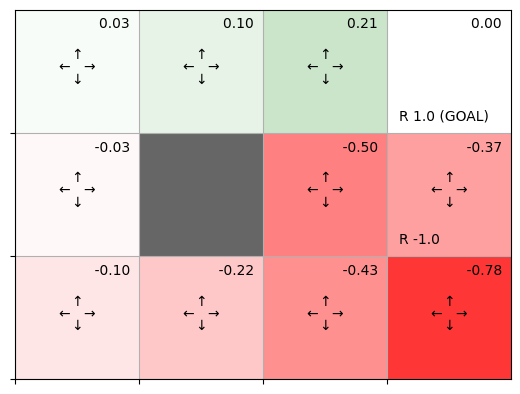

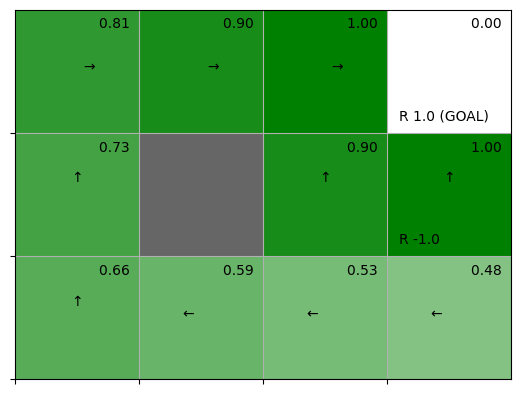

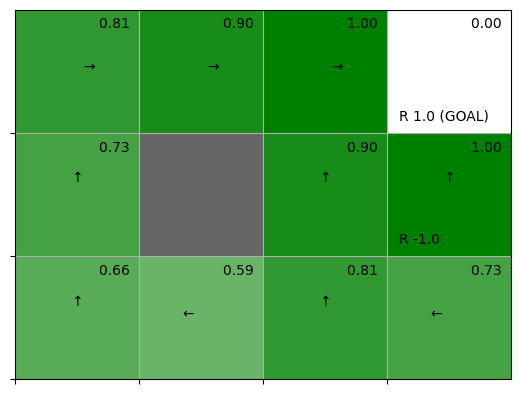

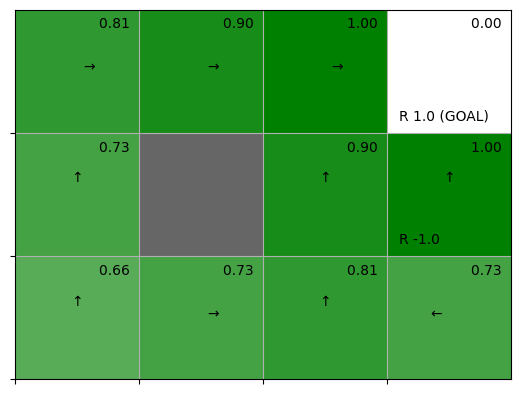

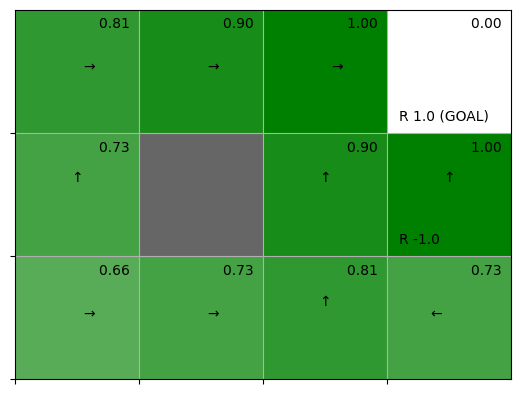

In [56]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)

<p align="center"><img src="./images/fig_04_16.png" width=700></p>

그림에서 보듯 처음에는 무작위 정책으로 시작했고 가치 함수 값은 마이너스가 대부분입니다. 하지만 네 번째 갱신 후에는 목표 지점을 제외한 모든 칸에서 플러스로 바뀝니다. 또한 진행 방향을 보면 모든 칸에서 폭탄을 피하고 사과를 얻는 방향으로 향하고 있습니다. 이것이 최적 정책입니다.

## 4.5 가치 반복법

정책반복법
<p align="center"><img src="./images/fig_04_17.png" width=200></p>
일반화한 정책반복법
<p align="center">
<img src="./images/fig_04_18.png" width=400>
<img src="./images/fig_04_19.png" width=400>
</p>

정책 반복법에서는 평가와 개선을 각각 '최대한'으로 하고 번갈아 수행합니다.  
평가와 개선을 각각 '최소한'으로 수행하는 것이 **가치 반복법** value iteration 입니다 


### 4.5.1 가치 반복법 도출

정책 반복법의 '평가'단계에서는 다음 그림처럼 반복적으로 가치 함수를 갱신합니다.
<p align="center"><img src="./images/fig_04_20.png" width=700></p>

가치 반복법은 상태 하나만 개선하고 곧장 평가 단계로 넘어갑니다. 평가 단계에서도 해당 상태 하나의 가치 함수를 한 번만 갱신합니다. 그런 다음 다른 위치를 개선하고 평가하는 흐름으로 진행됩니다.
<p align="center"><img src="./images/fig_04_21.png" width=400></p>

개선 단계에서 하는 탐욕화는 수식으로 다음과 같습니다.
<p align="center"><img src="./images/eq_04_08_1.png" width=700></p>

현재의 가치 함수는 $V(s)$로 표기하겠습니다. [식4.8]과 같이 현재 상태와 보상 그리고 다음 상태를 활용하여 argmax로 계산합니다. argmax는 하나의 행동을 선택해주므로 $\mu(s)$ 와 같이 결정적 정책으로 표현할 수 있습니다.

다음은 평가 단계입니다. 갱신 전의 가치 함수를 $V(s)$, 갱신 후의 가치 함수를 $V'(s)$라고 하면 DP에 의한 갱신식(반복적 정책 평가 알고리즘)은 다음과 같이 표현됩니다. 
<p align="center"><img src="./images/eq_04_09.png" width=700></p>

[식4.9]에서는 정책 $\pi(a|s)$가 확률적 정책으로 표기되어 있습니다. 그러나 '개선'단계를 한번 거치면 정책이 탐욕 정책으로 바뀝니다. 탐욕 정책은 값이 최대인 행동 하나만 선택하기 때문에 결정적입니다.  
[식4.9] 정책을 결정적 정책 $\mu(s)$로 취급하여 다음과 같이 단순화할 수 있습니다.
<p align="center"><img src="./images/eq_04_10.png" width=700></p>

이것이 '평가' 단계의 가치 함수 갱신식입니다. 이제 [식4.8]과 식[4.10]을 나란히 써보겠습니다.

<p align="center"><img src="./images/fig_04_22.png" width=600></p>

이 중복된 계산을 하나로 묶으면 다음과 같습니다.
<p align="center"><img src="./images/eq_04_11.png" width=700></p>

[식4.11]에서는 최댓값을 찾아주는 max 연산자를 사용하여 가치 함수를 직접 갱신합니다. 또한 정책 $\mu$를 사용하지 않고 가치 함수를 갱신하고 있습니다. 그래서 [식4.11]을 활용하여 최적 가치 함수를 구하는 알고리즘을 '가치 반복법'이라고 부릅니다.  
가치 반복법은 이 하나의 식만을 이용하여 '평가'와 '개선'을 동시에 수행합니다.

<p align="center"><img src="./images/fig_04_22_1.png" width=600></p>

또한 [식4.11]의 갱신식을 다음 형태로도 표현할 수 있습니다.
<p align="center"><img src="./images/eq_04_11_1.png" width=700></p>

$V_*(s)$가 주어지면 최적 정책 $\mu_*(s)$는 다음식으로 구할 수 있습니다.
<p align="center"><img src="./images/eq_04_12.png" width=700></p>  

[식4.12]에서 알 수 있듯이 탐욕 정책을 찾아내면 그것이 곧 최적 정책입니다.

### 4.5.2 가치 반복법 구현

<p align="center"><img src="./images/fig_04_23.png" width=700></p>

In [58]:
def value_iter_onestep(V, env, gamma):
    for state in env.states():       # 1 모든 상태에 차례로 접근
        if state == env.goal_state:  # 목표 상태에서의 가치 함수는 항상 0
            V[state] = 0
            continue

        action_values = []
        for action in env.actions():  # 2 모든 행동에 차례로 접근
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]  # 3 새로운 가치 함수
            action_values.append(value)

        V[state] = max(action_values)  # 4 최댓값 추출
    return V

이 함수는 매개변수로 가치 함수 V, 환경 env, 할인율 gamma를 받습니다.  
1에서 모든 상태에 순서대로 접근하고 2에서는 모든 행동에 순서대로 접근합니다.  
3에서는 [식4.13]의 중괄호 안쪽을 계산하고, 4에서는 최대값을 찾아 V[state]를 갱신합니다.

이제 갱신이 수렴할 때까지 value_iter_onestep() 함수를 반복 호출하면 됩니다.

In [59]:
def value_iter(V, env, gamma, threshold=0.001, is_render=True):
    while True:
        if is_render:
            env.render_v(V)

        old_V = V.copy()  # 갱신 전 가치 함수
        V = value_iter_onestep(V, env, gamma)

        # 갱신된 양의 최댓값 구하기
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        # 임계값과 비교
        if delta < threshold:
            break
    return V

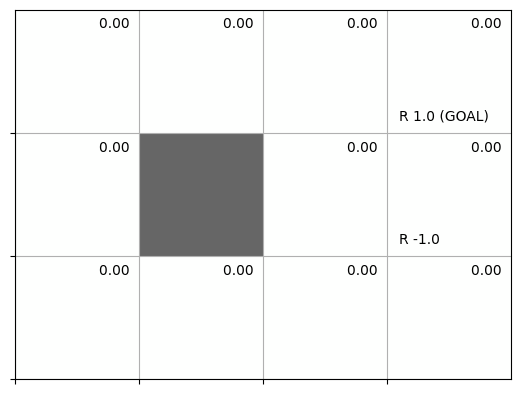

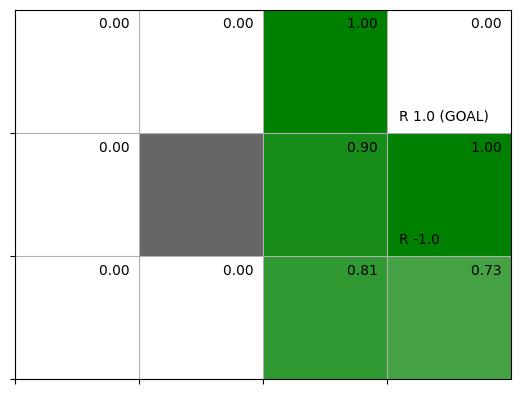

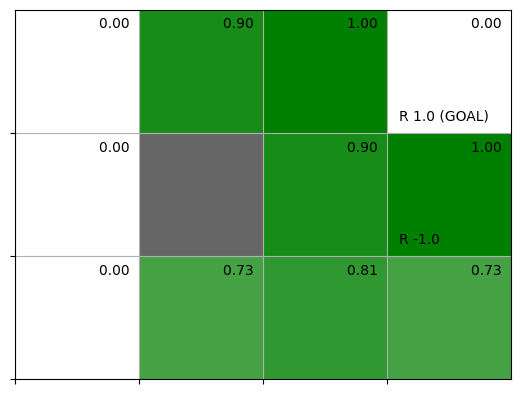

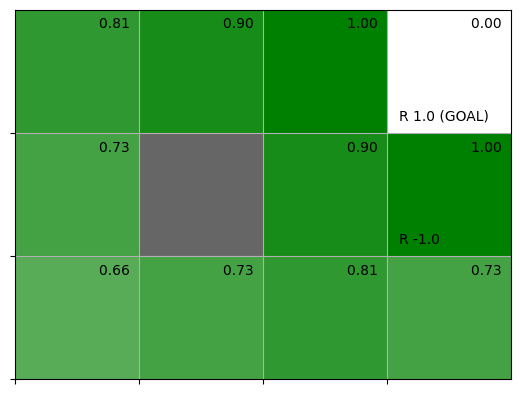

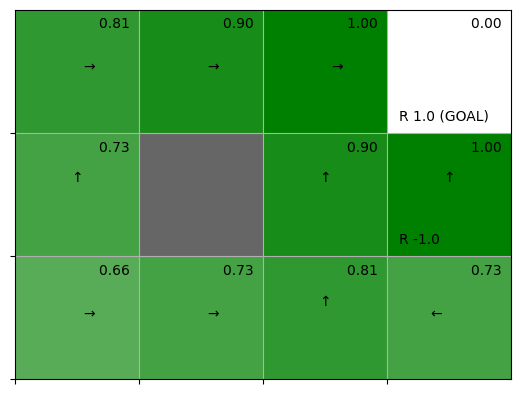

In [60]:
V = defaultdict(lambda: 0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)  # 최적 가치 함수 찾기

pi = greedy_policy(V, env, gamma)  # 최적 정책 찾기
env.render_v(V, pi)

가치 함수는 처음에는 모든 원소가 0인 딕셔너리로 시작합니다. 그리고 세 번의 갱신 결과 가치 함수의 값이 충분히 수렴합니다. 이것이 최적 상태 가치 함수입니다.
<p align="center"><img src="./images/fig_04_24.png" width=700></p>

또한 최적 상태 가치함수를 바탕으로 탐욕 정책을 얻으면 [그림4-25]와 같은 정책을 얻을 수 있습니다.
<p align="center"><img src="./images/fig_04_25.png" width=700></p>

## 4.6 정리

이번 장에서는 동적 프로그래밍(DP)을 이용하여 최적 정책을 구하는 방법을 배웠습니다.  
- **정책반복법**은 '평가'와 '개선'이라는 두 과정을 번갈아 반복합니다. 평가 단계에서는 DP를 이용해 가치 함수를 평가합니다. 가치 함수를 평가할 수 있다면 그 가치 함수를 탐욕화하여 정책을 개선할 수 있습니다. 만약 더 이상 개선되지 않는다면 그 정책이 곧 최적 정책입니다.
- **가치 반복법**은 평가와 개선을 융합한 기법입니다. 다음의 수식 하나만으로 가치함수를 갱신하고, 이 갱신을 반복하면 최적 가치 함수에 도달할 수 있습니다.

<p align="center"><img src="./images/eq_04_12_1.png" width=700></p>